Accuracy: 0.8513

Classification Report:
Class          Precision   Recall      F1-Score    Support
No Stroke      0.98        0.87        0.92        972.0       
Stroke         0.18        0.58        0.28        50.0        




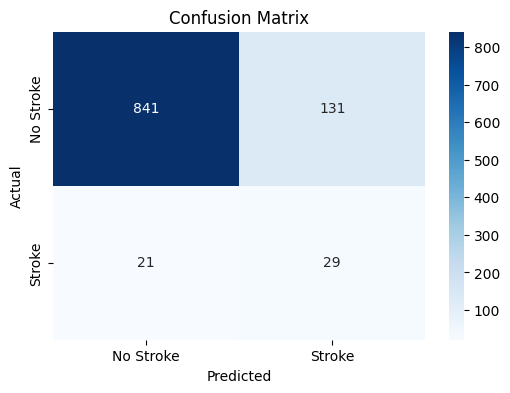

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv("cleaned_dataset.csv")

# Handle missing values in numerical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].apply(lambda x: x.fillna(x.mean()))

# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']):
    df[col], label_encoders[col] = pd.factorize(df[col])

# Feature selection
X = df.drop(columns=['stroke'])
y = df['stroke']

# Normalize numerical features
def normalize_features(X):
    numeric_cols = X.select_dtypes(include=[np.number]).columns
    scaler = StandardScaler()
    X[numeric_cols] = scaler.fit_transform(X[numeric_cols])
    return X

X = normalize_features(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Naïve Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
def evaluate_model(y_test, y_pred):
   # print("\nModel Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")

    report = classification_report(y_test, y_pred, target_names=["No Stroke", "Stroke"], output_dict=True)
    print("Classification Report:")
    print(f"{'Class':<15}{'Precision':<12}{'Recall':<12}{'F1-Score':<12}{'Support'}")
    for label, metrics in report.items():
        if label in ['No Stroke', 'Stroke']:
            print(f"{label:<15}{metrics['precision']:<12.2f}{metrics['recall']:<12.2f}{metrics['f1-score']:<12.2f}{metrics['support']:<12}")
    print("\n")

    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

evaluate_model(y_test, y_pred)